In [ ]:
!pip install geopandas
import geopandas
!pip install contextily
import contextily as ctx
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import shapely.wkt

In [ ]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bike_aree =  geopandas.read_file('/content/drive/MyDrive/bike_areesosta.zip')
quartiere =  geopandas.read_file('/content/drive/MyDrive/ds964_nil_wm')
stradario =  pd.read_csv('/content/drive/MyDrive/stradario.csv')
quartiere

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


# - una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette

In [ ]:
stradario["CODICE_VIA"] = stradario["CODICE_VIA"].astype(str)

sosta_stradario = pd.merge(bike_aree,stradario,how="inner",left_on = "id_via",right_on = "CODICE_VIA")
sosta_stradario[['CIVICO', 'DESCRIZIONE_VIA','stalli_tot']]

,CIVICO,DESCRIZIONE_VIA,stalli_tot
0,1,ABBIATEGRASSO,15
1,2,ABBIATEGRASSO,15
2,7,ABBIATEGRASSO,15
3,8,ABBIATEGRASSO,15
4,12,ABBIATEGRASSO,15
...,...,...,...
39919,117,SAN DIONIGI,30
39920,119,SAN DIONIGI,30
39921,120,SAN DIONIGI,30
39922,121,SAN DIONIGI,30


# - una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere


In [ ]:
quartieri_sosta = geopandas.sjoin(sosta_stradario, quartiere, op = "within", how = "left")
quartieri_sosta2 = quartieri_sosta[['DESCRIZIONE_VIA', "CIVICO","NIL", "stalli_tot"]]
quartieri_sosta2

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


,DESCRIZIONE_VIA,CIVICO,NIL,stalli_tot
0,ABBIATEGRASSO,1,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,15
1,ABBIATEGRASSO,2,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,15
2,ABBIATEGRASSO,7,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,15
3,ABBIATEGRASSO,8,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,15
4,ABBIATEGRASSO,12,STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...,15
...,...,...,...,...
39919,SAN DIONIGI,117,SCALO ROMANA,30
39920,SAN DIONIGI,119,SCALO ROMANA,30
39921,SAN DIONIGI,120,SCALO ROMANA,30
39922,SAN DIONIGI,121,SCALO ROMANA,30


#- i nomi dei quartieri in cui non ci sono aree di sosta;


In [ ]:
non_aree = quartiere[~quartiere['NIL'].isin(quartieri_sosta["NIL"])]
non_aree.count()

ID_NIL        12
NIL           12
Valido_dal    12
Valido_al     12
Fonte         12
Shape_Leng    12
Shape_Area    12
OBJECTID      12
geometry      12
dtype: int64

# - una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta


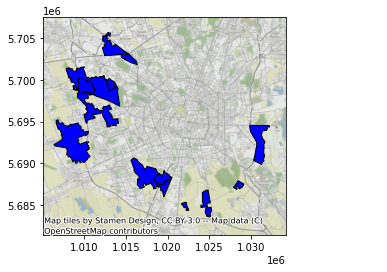

In [ ]:
ax= quartiere.to_crs(epsg=3857).plot(facecolor='None')
non_aree.to_crs(epsg=3857).plot(ax=ax,edgecolor='k',facecolor='b')
ctx.add_basemap(ax)

# - il nome del quartiere con più aree di sosta;


In [ ]:
prova = quartieri_sosta.groupby("NIL", as_index = False)[["stalli_tot"]].count()
prova2 = prova[prova["stalli_tot"] == prova["stalli_tot"].max()]
prova2

,NIL,stalli_tot
31,LORETO - CASORETTO - NOLO,4090


In [ ]:
a = quartieri_sosta.groupby('NIL').count().sort_values('DESCRIZIONE_VIA', ascending=False)[['DESCRIZIONE_VIA']].reset_index()
a

,NIL,DESCRIZIONE_VIA
0,LORETO - CASORETTO - NOLO,4090
1,BUENOS AIRES - PORTA VENEZIA - PORTA MONFORTE,2715
2,GORLA - PRECOTTO,2553
3,CITTA' STUDI,2179
4,BRERA,1538
...,...,...
71,PARCO SEMPIONE,18
72,TIBALDI,16
73,PARCO DELLE ABBAZIE,12
74,MAGGIORE - MUSOCCO - CERTOSA,8


# - una mappa di Milano con l'indicazione del quartiere con più aree di sosta;



In [ ]:
quartieri_count = pd.merge(prova, quartiere, how = "right", on = "NIL")
quartieri_count

,NIL,stalli_tot,ID_NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,52.0,48,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,TRENNO,NaN,64,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,PORTELLO,354.0,67,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,BOVISASCA,146.0,81,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,PARCO NORD,6.0,84,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...,...
83,PAGANO,447.0,68,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,BRERA,1538.0,2,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,ROGOREDO - SANTA GIULIA,54.0,33,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,ADRIANO,99.0,17,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


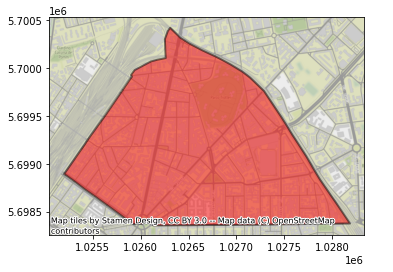

In [ ]:
loreto = quartieri_count[quartieri_count["stalli_tot"] == quartieri_count["stalli_tot"].max()]
ax = loreto.to_crs(epsg=3857).plot(facecolor = "r", edgecolor = "k", linewidth = 2, alpha = 0.5)
ctx.add_basemap(ax)

#- i nomi dei quartieri con un numero di aree di sosta minori della media;

In [ ]:
media = prova["stalli_tot"].mean()
quartieri_minori_media = quartieri_count[quartieri_count["stalli_tot"] < media]
quartieri_minori_media

# - una mappa di Milano con l'indicazione dei quartieri con un numero di aree di sosta minori della media;

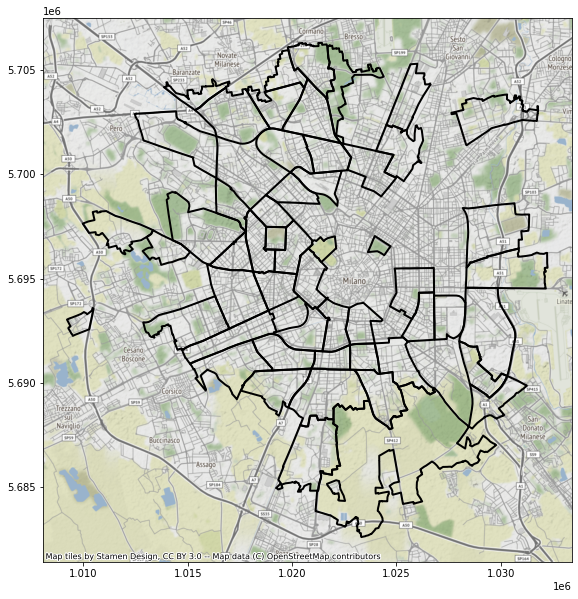

In [ ]:
ax = quartieri_minori_media.to_crs(epsg=3857).plot(figsize=(20,10), facecolor = "none", edgecolor = "k", linewidth = 2)
ctx.add_basemap(ax)

# - una mappa di Milano con i diversi quartieri e l'indicazione delle aree di sosta, sottoforma di punti rossi;

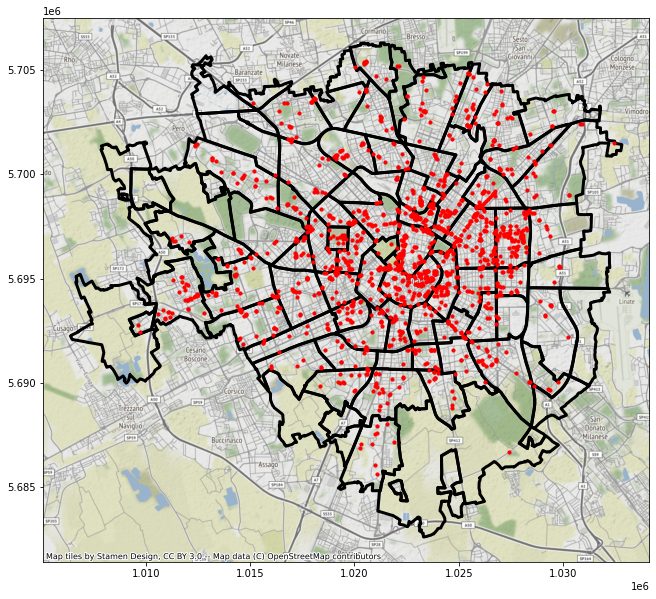

In [ ]:
ax = quartiere.to_crs(epsg=3857).plot(figsize = (20,10), facecolor = "none", edgecolor = "k", linewidth = 3)
bike_aree.to_crs(epsg=3857).plot(ax = ax, color = "red", markersize = 10)
ctx.add_basemap(ax)

# - una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;

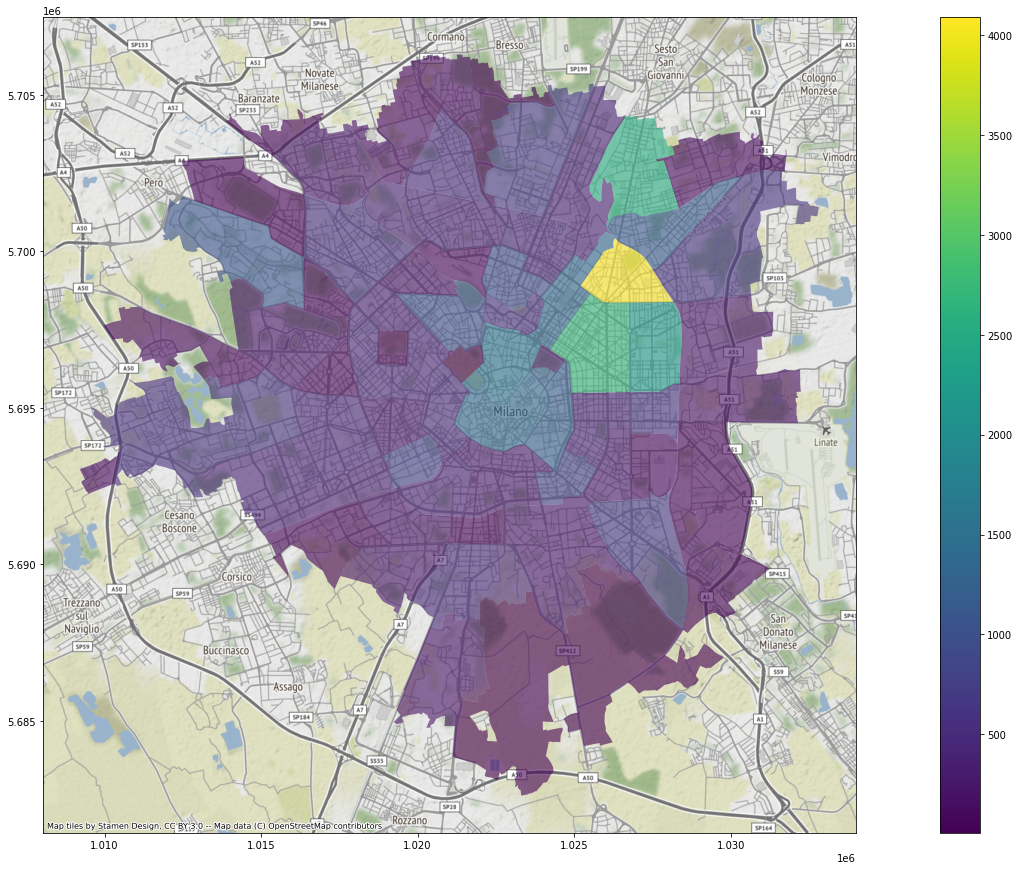

In [ ]:
ax = quartieri_count.to_crs(epsg=3857).plot(column = "stalli_tot", alpha = 0.6, figsize = (30,15), legend = True)
ctx.add_basemap(ax)

# - data una via (inserita dall'utente), avere le aree di sosta di quella via
